# Getting data-set from git repository

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [92]:
df_male = pd.read_csv("https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv")
df_female = pd.read_csv("https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv")

In [93]:
df_male.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [94]:
df_female.sample(5)

,name,gender,race
11199,muskan,f,indian
1222,anuradha,f,indian
12187,smt shankarbhaya,f,indian
4538,noorjahan,f,indian
6823,resham,f,indian


In [180]:
df = pd.concat([df_male, df_female])
data = df[['name', 'gender']].values
data

array([['barjraj', 'm'],
       ['ramdin verma', 'm'],
       ['sharat chandran', 'm'],
       ...,
       ['manju d/0 baboo lal jatav', 'f'],
       ['shivani', 'f'],
       ['nayna', 'f']], dtype=object)

In [181]:
X = data[:, :-1]
y = data[:, -1]

X, y

(array([['barjraj'],
        ['ramdin verma'],
        ['sharat chandran'],
        ...,
        ['manju d/0 baboo lal jatav'],
        ['shivani'],
        ['nayna']], dtype=object),
 array(['m', 'm', 'm', ..., 'f', 'f', 'f'], dtype=object))

In [182]:
gender_count = {'male': len(df_male), 'female': len(df_female)}
gender_count

{'male': 14845, 'female': 15382}

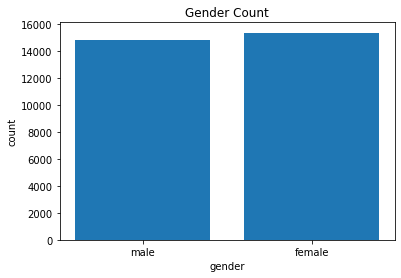

In [183]:
plt.bar(gender_count.keys(), gender_count.values())
plt.ylabel('count')
plt.xlabel('gender')
plt.title('Gender Count')
plt.show()

In [184]:
X = np.vectorize(lambda x : str(x).split()[0], otypes=[str])(X)
X

array([['barjraj'],
       ['ramdin'],
       ['sharat'],
       ...,
       ['manju'],
       ['shivani'],
       ['nayna']], dtype='<U23')

In [185]:
def getMaxLength(names):
    return max(len(name) for name in names)

max_length = getMaxLength(X.reshape(-1))
max_length

23

In [186]:
def OHE(names,max_length):
    names = np.char.lower(names)
    x = np.zeros((names.shape[0],max_length,26))
    for i in range(0,names.shape[0]):
        for j in range(0,len(names[i, 0])):
            if(names[i, 0][j]>='a' and names[i, 0][j]<='z'):
                char_index = ord(names[i, 0][j])-ord('a')
                x[i,j,char_index] = 1.0
    return x

In [190]:
X_encoded = OHE(X, max_length)
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(x_encoded)
normalized_model = Sequential([norm_l])
normalized_model.compile()
x_norm = normalized_model(x_encoded)
y_int = np.where(y=='m', 0, 1)
x_norm = x_norm.numpy()
x_norm = x_norm.reshape(30227, 23*26)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_int, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((20252, 598), (9975, 598))

In [197]:
model = Sequential([
    Dense(598, activation="relu", kernel_regularizer = regularizers.L2(1e-3)),
    Dense(54, activation="relu", kernel_regularizer = regularizers.L2(1e-3)),
    Dense(1, activation="linear", kernel_regularizer = regularizers.L2(1e-3))
])

model.compile(loss=BinaryCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01))
history = model.fit(X_train,y_train,epochs=100,batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.8498 - val_loss: 0.5555
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.5182 - val_loss: 0.4634
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4460 - val_loss: 0.4528
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4181 - val_loss: 0.4279
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3983 - val_loss: 0.4101
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3798 - val_loss: 0.3910
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3760 - val_loss: 0.4021
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3706 - val_loss: 0.3939
Epoch 9/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3680 - val_loss: 0.3971
Epoch 10/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3654 - val_loss: 0.4172
Epoch 11/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3745 - val_loss: 0.3935
Epoch 12/100
317/317 ━━━━━━━━━━━━━━

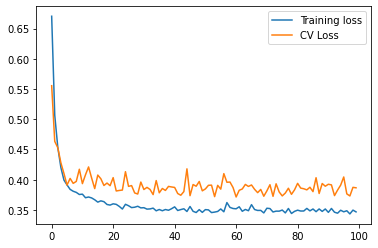

In [199]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='CV Loss')
plt.legend()

In [215]:
def predict(names):
    names = OHE(names, 23)
    names = normalized_model(names).numpy()
    names = names.reshape(names.shape[0], 23*26)
    y_hat = model.predict(names)
    y_hat = tf.nn.sigmoid(y_hat)
    y_hat = y_hat.numpy()
    y_hat = np.where(y_hat>0.5, 'F', 'M')
    
    return y_hat



In [238]:
names = np.array([['Sweta'],['Shubham'],['Rohit'],['Anchal'],
                 ['Sakshi'],['Rahul'],['Gaurishankar'],
                 ['Radhe'],['Radha'],['Aryan'],['Ashwin'],['laddu'],['Nishtha'], ['Aman']])
yhat = predict(names)
for i in range(names.shape[0]):
    print(f'{names[i, 0]}\t\t{yhat[i, 0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sweta		F
Shubham		F
Rohit		M
Anchal		F
Sakshi		F
Rahul		M
Gaurishankar		M
Radhe		M
Radha		F
Aryan		M
Ashwin		M
laddu		M
Nishtha		F
Aman		M


In [239]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


# Decision Tree

In [1]:
from sklearn.Tree import DecisionTree

ModuleNotFoundError: No module named 'sklearn.Tree'

In [43]:
import numpy as np
import pickle

In [44]:
def transform(name):
    
    ## Applying one hot encoding
    x = np.array([name])
    x = np.char.lower(x)

    name = np.zeros((23, 26))
    for i in range(len(x[0])):
        if x[0][i] >= 'a' and x[0][i] <= 'z':
            index = ord(x[0][i]) - ord('a')
            name[i, index] = 1

    return name

In [45]:
name = "Aman"
result = transform(name)
result = result.reshape(-1)
result = np.array([result])
result.shape

(1, 598)

In [46]:
result.shape

(1, 598)

In [58]:
import pickle

def predict_gender(name):
    model = pickle.load(open('trainedModel/model.pkl', 'rb'))
    valid_input = transform(name)
    
    valid_input = valid_input.reshape(-1)
    valid_input = np.array([valid_input])
    
    yhat = model.predict(valid_input)
    yhat = tf.nn.sigmoid(yhat)
    
    return "Female" if yhat >= 0.5 else  "Male"


In [97]:
predict_gender('Krishna')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


'Female'

In [76]:
def valid(name):
    valid_name = transform('Krishna')
    valid_name = valid_name.reshape(-1)
    valid_name = np.array([valid_name])
    
    return valid_name


In [73]:
model_ = pickle.load(open('trainedModel/model.pkl', 'rb'))

In [74]:
import tensorflow as tf

In [84]:
name = valid('Aman')
y = model_.predict(name)
y = tf.nn.sigmoid(y)
print(y)
res = 'Female' if y > 0.5 else 'Male'
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
tf.Tensor([[0.6745828]], shape=(1, 1), dtype=float32)


'Female'

In [ ]:
.6745828